C:\Users\10075\AppData\Local\Temp\ipykernel_28684\2742252264.py:108: DtypeWarning: Columns (4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


-------------------------------------------------------
          種類   地域 都道府県名 市区町村名 区の平均世帯年収:円     価格相場：円  家賃相場：円  地区名 最寄駅：名称  \
0  宅地(土地と建物)  商業地   東京都  千代田区    8140000  111660000  309000  飯田橋    飯田橋   
1  宅地(土地と建物)  商業地   東京都  千代田区    8140000  111660000  309000  飯田橋    飯田橋   
2  宅地(土地と建物)  商業地   東京都  千代田区    8140000  111660000  309000  飯田橋    飯田橋   
3  宅地(土地と建物)  商業地   東京都  千代田区    8140000  111660000  309000  飯田橋    飯田橋   
4  宅地(土地と建物)  商業地   東京都  千代田区    8140000  111660000  309000  飯田橋    飯田橋   

  最寄駅：距離（分）  ...        用途 今後の利用目的  前面道路：方位 方位評価 前面道路：種類 前面道路：幅員（ｍ） 都市計画  \
0         4  ...        住宅      住宅       南東    5      区道        4.0   商業   
1         1  ...       事務所     事務所       北東    4      区道       11.0   商業   
2         2  ...    事務所、店舗     事務所       南西    5      区道        6.0   商業   
3         2  ...    事務所、店舗      店舗       北西    3      区道        4.0   商業   
4         1  ...  共同住宅、事務所     NaN       南西    5      都道       27.0   商業   

  建ぺい率（％） 容積率（％）        取引時期  
0    

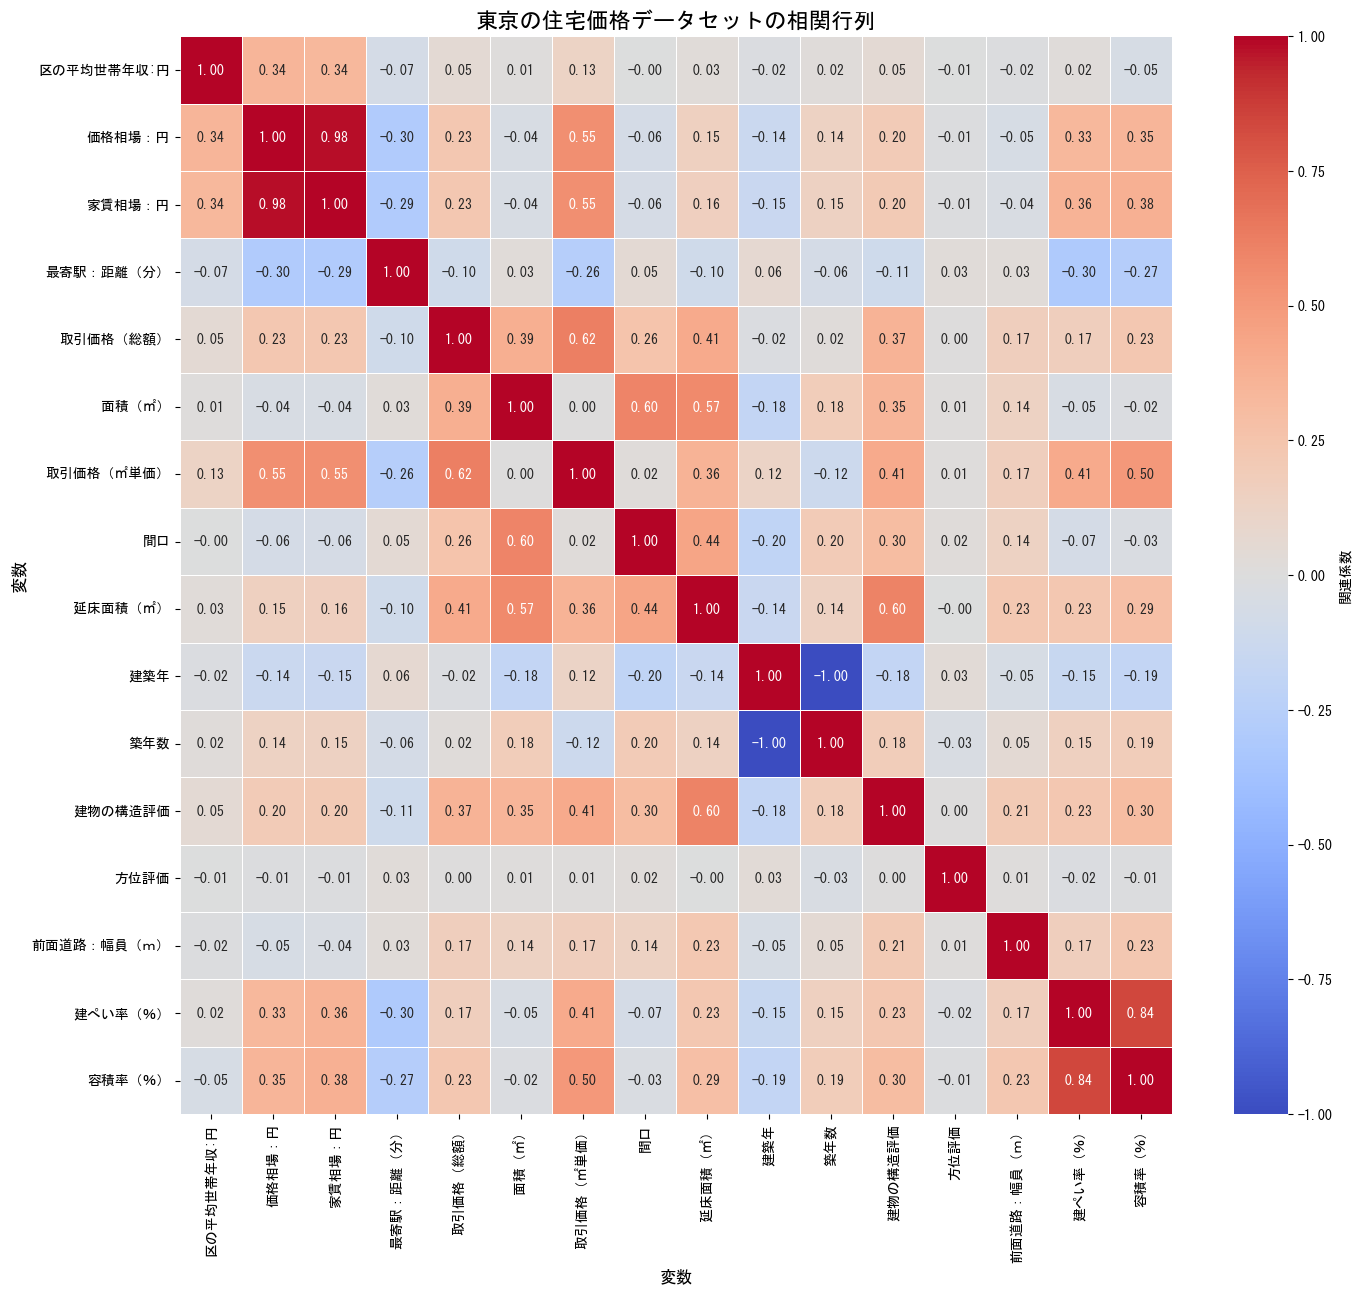

LinearRegression 最佳参数: {}
Ridge 最佳参数: {'alpha': 1.0}
Lasso 最佳参数: {'alpha': 1.0}
SVR 最佳参数: {'C': 10.0, 'kernel': 'linear'}
RandomForest 最佳参数: {'max_depth': 20, 'n_estimators': 200}
-------------------------------------------------------
迭代次数 0, 损失函数值: 2603657363729995.0
迭代次数 10, 损失函数值: 108394667952759.56
迭代次数 20, 损失函数值: 72739388354511.42
迭代次数 30, 损失函数值: 67278012440750.84
迭代次数 40, 损失函数值: 64456152473435.34
迭代次数 50, 损失函数值: 62871257903484.31
迭代次数 60, 损失函数值: 61954860585462.72
迭代次数 70, 损失函数值: 61406432684445.78
迭代次数 80, 损失函数值: 61063202134976.61
迭代次数 90, 损失函数值: 60836188183650.25
迭代次数 100, 损失函数值: 60676420734881.375
迭代次数 110, 损失函数值: 60556755134258.42
迭代次数 120, 损失函数值: 60462003189486.86
迭代次数 130, 损失函数值: 60383553521437.12
迭代次数 140, 损失函数值: 60316429513450.25
迭代次数 150, 损失函数值: 60257675562680.71
迭代次数 160, 损失函数值: 60205469184263.31
迭代次数 170, 损失函数值: 60158630773623.63
迭代次数 180, 损失函数值: 60116351776737.09
迭代次数 190, 损失函数值: 60078043133294.37


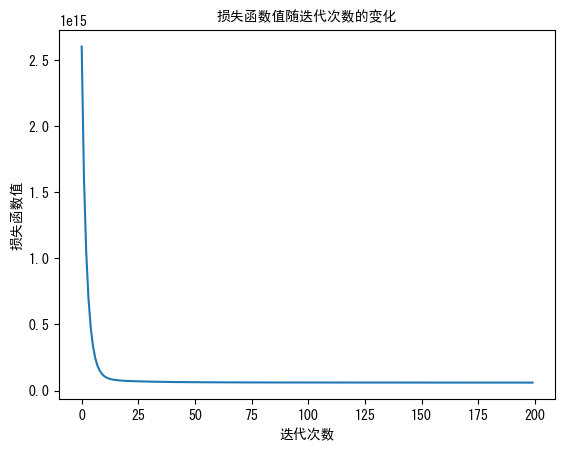

Test MSE: 61141428182193.125
---MSE : 衡量预测值与实际值之间的平均平方误差，值越小越好。---

RandomForest - 计算均方误差 (MSE): 170843621494.21646
-------------------------------------------------------

--- R² : 反映模型解释数据变异的程度，值越接近1越好---

RandomForest - 决定系数 (R²): 0.9995415067823162

-------------------------------------------------------

---耗时---训练数据得分---测试数据得分-------------
elaspe:0.171875;train_score:1.000000;test_score:1.000000
-------------------------------------------------------


MemoryError: Unable to allocate 2.50 GiB for an array with shape (21642, 15504) and data type float64

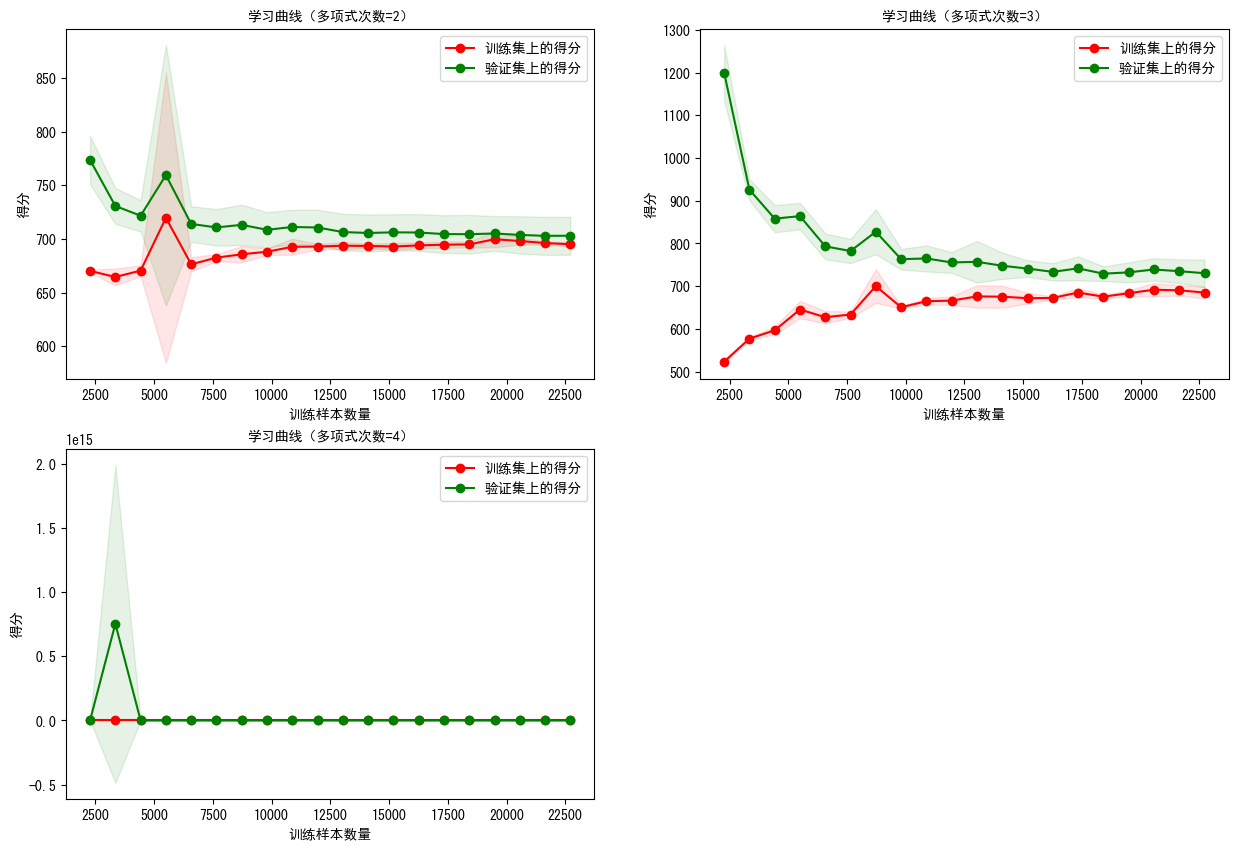

In [2]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt  # 数据可视化
import pandas as pd  # 数据处理和分析
import numpy as np  # 科学计算
import time # 测量代码段的执行时间
import seaborn as sns

from sklearn.linear_model import BayesianRidge
from sklearn.pipeline import Pipeline # 管理机器学习工作流程
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, GridSearchCV  # 数据划分、交叉验证、学习曲线、网格搜索
from sklearn.preprocessing import StandardScaler, PolynomialFeatures  # 数据标准化、多项式特征
from sklearn.linear_model import LinearRegression, Ridge, Lasso  # 回归模型
from sklearn.svm import SVR  # 支持向量回归
from sklearn.ensemble import RandomForestRegressor  # 随机森林回归
from sklearn.metrics import mean_squared_error, r2_score  # 模型评估
from matplotlib import font_manager


# 主要影响因素
#---------------------------------------------------------------------------------------
# 最寄駅：距離（分） ⇒　〇
#---------------------------------------------------------------------------------------
# 取引価格（総額）⇒　〇
#---------------------------------------------------------------------------------------
# 面積（㎡）⇒　〇
#---------------------------------------------------------------------------------------
# 建築年　⇒　計算要
#---------------------------------------------------------------------------------------
# 建物の構造　⇒　补充評価要
# RC（鉄筋コンクリート造）：钢筋混凝土结构，抗震性和耐久性强，维护成本相对较高。
# SRC（鉄骨鉄筋コンクリート造）：钢骨钢筋混凝土结构，具有更高的抗震性和耐久性，但成本更高。
# 鉄骨造（S造）：钢结构，抗震性较好，施工速度快，适合高层建筑，但防火性能需要特别注意。
# 木造：木结构，施工方便，成本低，适合低层住宅，但抗震性和耐久性较弱。
# 軽量鉄骨造：轻钢结构，适用于小型建筑，施工速度快，但抗震性和耐久性不如重型钢结构。
# ブロック造：块状建筑材料，适合小型建筑，但抗震性较弱。
# ※如果数据有缺失，默认给最低分
# structure_scores = {
#     'ＳＲＣ': 10,
#     'ＳＲＣ、鉄骨造': 9,
#     'ＲＣ': 8,
#     'ＳＲＣ、ＲＣ': 7,
#     'ＲＣ、鉄骨造': 6,
#     'ＲＣ、鉄骨造、木造': 5,
#     'ＲＣ、ブロック造': 5,
#     'ＲＣ、木造': 5,
#     'ＲＣ、軽量鉄骨造': 5,
#     'ＲＣ、木造、ブロック造': 5,
#     'ＲＣ、鉄骨造、軽量鉄骨造': 5,
#     'ＳＲＣ、木造': 4,
#     '木造、ブロック造': 4,
#     '軽量鉄骨造': 4,
#     '鉄骨造': 4,
#     '鉄骨造、軽量鉄骨造': 4,
#     '鉄骨造、木造': 3,
#     '鉄骨造、木造、軽量鉄骨造': 3,
#     '鉄骨造、ブロック造': 3,
#     '鉄骨造、木造、ブロック造': 3,
#     'ＲＣ、鉄骨造、木造、ブロック造': 3,
#     'ブロック造、軽量鉄骨造': 2,
#     'ブロック造': 2,
#     np.nan: 1  # 如果有缺失值，则给最低分
# }
#----------------------------------------------------------------------------------------
# 地区名　⇒　評価要
#---------------------------------------------------------------------------------------
# 土地の形状 ⇒　評価要
#---------------------------------------------------------------------------------------
# 前面道路：方位 ⇒ 
# 南（南東、南西）：采光好，冬暖夏凉，通常评分最高。
# 東、東南（北東）：早晨采光好，通风较好，评分次高。
# 西、西南（北西）：下午采光好，但夏季较热，评分中等。
# 北（北東、北西）：采光较差，但夏季凉爽，评分较低。
# 接面道路無：无道路朝向，视具体情况评分。
# nan：缺失值，视具体情况评分。
# 如果有缺失值，则给最低分
# orientation_scores = {
#     '南': 5,
#     '南東': 5,
#     '南西': 5,
#     '東': 4,
#     '北東': 4,
#     '西': 3,
#     '北西': 3,
#     '北': 2,
#     '接面道路無': 1,
#     None: 0  # 缺失值评分最低
# }
#---------------------------------------------------------------------------------------
# 建ぺい率（％）：
# 80% 以上：高い（建物の占有率が高く、敷地を最大限に活用している）
# 60% ～ 80%：中程度（適度な敷地利用）
# 60% 未満：低い（建物の占有率が低く、敷地の利用が低い）
#---------------------------------------------------------------------------------------
# 容積率（％）：
# 500% 以上：高い（建物の総床面積が大きい、高密度）
# 300% ～ 500%：中程度（適度な建物規模）
# 300% 未満：低い（建物の総床面積が小さい、低密度）
#---------------------------------------------------------------------------------------

# 设置日文字体为Windows系统自带的MS Gothic字体
plt.rcParams['font.sans-serif'] = ['MS Gothic']
plt.rcParams['axes.unicode_minus'] = False



# 加载数据集
file_path = 'E:\\AI\\0705fix Tokyo house price.csv'
df = pd.read_csv(file_path)

# 显示数据集的基本信息
print('-------------------------------------------------------')
print(df .head())  # 显示数据集前几行
print('-------------------------------------------------------')
print(df .info())  # 显示数据集基本信息_如列数、列名、非空值数量、数据类型等
print('-------------------------------------------------------')
print(df .describe())  # 显示数据集描述性统计信息
print('-------------------------------------------------------')
print(df .isnull().sum())  # 检查数据集中各列的缺失值数量_计算每列的缺失值数量
print('-------------------------------------------------------')
# 数据列
numeric_columns = ['種類', '価格情報区分', '地域', '市区町村コード', '都道府県名', '市区町村名', '地区名','区の平均世帯年収:円','価格相場：円','家賃相場：円', '最寄駅：名称','最寄駅：距離（分）', '取引価格（総額）', '面積（㎡）', '取引価格（㎡単価）', '土地の形状', '間口','延床面積（㎡）', '建築年','築年数','建物の構造評価', '用途', '今後の利用目的', '方位評価','前面道路：種類','前面道路：幅員（ｍ）', '都市計画', '建ぺい率（％）', '容積率（％）', '取引時期', '取引の事情等']

# 打印每一列的唯一值和唯一值的数量
for column in df.columns:
    unique_values = df[column].unique()
    unique_count = df[column].nunique()
    print(f"{column}: 有 {unique_count} 个唯一值。")
    print(f"这些唯一值是: {unique_values}")
    print()

# 筛选出'取引時期'列中包含2018年至2023年的数据
df['取引時期'] = df['取引時期'].astype(str)
filtered_df = df[df['取引時期'].str.contains(r'202[0-3]|201[8-9]', regex=True)]
filtered_df = filtered_df.query('種類 == "宅地(土地と建物)"')
filtered_df = filtered_df.query('今後の利用目的 == "住宅"')

selected_columns = [ '区の平均世帯年収:円','価格相場：円','家賃相場：円','最寄駅：距離（分）', '取引価格（総額）',  '面積（㎡）', '取引価格（㎡単価）',  '間口','延床面積（㎡）', '建築年','築年数','建物の構造評価', '方位評価','前面道路：幅員（ｍ）',  '建ぺい率（％）', '容積率（％）']
selected_df = filtered_df[selected_columns]

# 转换为数值类型
selected_df = selected_df.apply(pd.to_numeric, errors='coerce')

# 处理缺失值
selected_df.fillna(selected_df.median(), inplace=True)

# 计算IQR并过滤异常值
# IQR_四分位距法:识别数据集中异常值的统计技术。
# 它基于数据的分布特性，特别是数据的四分位数。
# IQR 是第三四分位数（Q3）和第一四分位数（Q1）之间的差值，表示数据中间50%的分布范围。
Q1 = selected_df.quantile(0.25) # 下四分位数，它是将数据集中数值较小的一半分开的值。在排序后的数据中，Q1 是位于25%位置的值。
Q3 = selected_df.quantile(0.75)# 上四分位数，它是将数值较大的一半数据分开的值。Q3 是位于75%位置的值。
IQR = Q3 - Q1 
# 上界（Upper Bound）：Q3 + 1.5 * IQR
# 下界（Lower Bound）：Q1 - 1.5 * IQR
is_outlier = (selected_df < (Q1 - 1.5 * IQR)) | (selected_df > (Q3 + 1.5 * IQR))
data_cleaned = selected_df[~is_outlier.any(axis=1)]

# 计算相关矩阵
correlation_matrix = selected_df.corr()

# 打印完整的相关性矩阵
print("相关性矩阵:")
print(correlation_matrix)


# 创建热图
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'label': '関連係数'})

# 设置图表标题和轴标签为日文
plt.title('東京の住宅価格データセットの相関行列', fontsize=16)
plt.xlabel('変数', fontsize=12)
plt.ylabel('変数', fontsize=12)

# 设置x轴和y轴的刻度标签为日文
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# 数据预处理
X = data_cleaned.drop('取引価格（総額）', axis=1)
y = data_cleaned['取引価格（総額）']

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 特征标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 定义要评估的模型和参数
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'SVR': SVR(),
    'RandomForest': RandomForestRegressor()
}

params = {
    'LinearRegression': {},
    'Ridge': {'alpha': [0.1, 1.0, 10.0]},
    'Lasso': {'alpha': [0.1, 0.5, 1.0]},
    'SVR': {'C': [0.1, 1.0, 10.0], 'kernel': ['linear', 'poly', 'rbf']},
    'RandomForest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
}

# 进行网格搜索和交叉验证
best_estimators = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, params[name], cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_estimators[name] = grid_search.best_estimator_
    print(f'{name} 最佳参数: {grid_search.best_params_}')
print('-------------------------------------------------------')

# 均方误差损失函数
def mse_loss(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

# 梯度下降算法实现
def gradient_descent(X, y, lr=0.01, epochs=100):
    m, n = X.shape
    X = np.c_[np.ones(m), X]
    theta = np.zeros(n + 1)
    losses = []

    for epoch in range(epochs):
        y_pred = X.dot(theta)
        loss = mse_loss(y, y_pred)
        losses.append(loss)

        gradient = -(2/m) * X.T.dot(y - y_pred)
        theta -= lr * gradient

        if epoch % 10 == 0:
            print(f"迭代次数 {epoch}, 损失函数值: {loss}")

    return theta, losses

# 使用训练数据执行梯度下降
theta, losses = gradient_descent(X_train, y_train, lr=0.1, epochs=200)

# 可视化损失函数值随迭代次数的变化
# 预想结果图　：X轴表示迭代次数 / Y轴表示损失函数值  →  随着迭代次数的增加，损失函数值应逐渐减小并趋于稳定，表明模型参数在收敛。
plt.plot(losses)
plt.title('损失函数值随迭代次数的变化', fontproperties='SimHei')
plt.xlabel('迭代次数', fontproperties='SimHei')
plt.ylabel('损失函数值', fontproperties='SimHei')
plt.show()


# 预测
X_test_bias = np.c_[np.ones(X_test.shape[0]), X_test]  # 添加偏置项
y_pred = X_test_bias.dot(theta)

# 计算测试集上的MSE
mse_test = mse_loss(y_test, y_pred)
print("Test MSE:", mse_test)



# 评估每个模型的性能
for name, model in best_estimators.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
print('---MSE : 衡量预测值与实际值之间的平均平方误差，值越小越好。---')
print('')
print(f'{name} - 计算均方误差 (MSE): {mse}')
print('-------------------------------------------------------')
print('')
print('--- R² : 反映模型解释数据变异的程度，值越接近1越好---')
print('')
print(f'{name} - 决定系数 (R²): {r2}')
print('')
print('-------------------------------------------------------')

print('')
print('---耗时---训练数据得分---测试数据得分-------------')
# 模型评分和时间记录
def polynomial_model(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('linear', LinearRegression())  # 定义多项式回归模型
    ])

model = polynomial_model(degree=2) # 实例化模型
start = time.process_time() # 记录开始时间
model.fit(X_train, y_train)  # 训练模型
train_score = model.score(X_train, y_train) # 训练集得分
test_score = model.score(X_test, y_test) # 测试集得分
print("elaspe:{0:.6f};train_score:{1:0.6f};test_score:{2:.6f}"
      .format(time.process_time() - start, train_score, test_score))  # 打印训练时间和得分
print('-------------------------------------------------------')

# 多项式回归优化模型，并展示不同多项式次数的学习曲线
plt.figure(figsize=(15, 10))

for i, degree in enumerate([2, 3, 4, 5]):  # 多项式次数
    # 创建多项式特征转换器
    poly = PolynomialFeatures(degree=degree)# 为当前的多项式次数创建一个多项式特征转换器。
    X_poly = poly.fit_transform(X)# 将数据集X转换成多项式特征。

    
    # 分割数据_多项式特征数据分为训练集和测试集，保持20%的数据作为测试集。随机种子设为42以保证结果的可重复性。
    X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(
        X_poly, y, test_size=0.2, random_state=42
    )
    
    # 数据标准化
    scaler_poly = StandardScaler()# 创建一个标准化器。
    X_train_poly = scaler_poly.fit_transform(X_train_poly) # 对训练数据进行标准化处理。
    X_test_poly = scaler_poly.transform(X_test_poly) # 用相同的变换对测试数据进行标准化。
    
    # 定义并训练模型
    model_poly = LinearRegression() # 初始化线性回归模型。
    model_poly.fit(X_train_poly, y_train_poly) # 用标准化后的训练数据训练模型。
    
    # 生成更细粒度的训练集大小
    #数组的起始值为0.1  → 表示使用最少10%的数据作为训练集。
    #数组的终止值为1.0 →最多使用100%的数据作为训练集。
    #20 → 在0.1到1.0之间生成20个等间隔的点。

    train_sizes = np.linspace(0.1, 1.0, 20) 
    
    # 获取学习曲线数据
    train_sizes, train_scores, test_scores = learning_curve(
        model_poly, X_train_poly, y_train_poly, 
        train_sizes=train_sizes, cv=10, scoring='neg_mean_squared_error', n_jobs=-1
    )
    
    # 计算得分的平均值和标准差
    train_scores_mean = -train_scores.mean(axis=1)# 计算训练得分的平均值并取负值（因为使用的是负均方误差）。
    train_scores_std = train_scores.std(axis=1)
    test_scores_mean = -test_scores.mean(axis=1)# 计算测试得分的平均值。
    test_scores_std = test_scores.std(axis=1)
    
    # 子图
    plt.subplot(2, 2, i+1)
    
    # 绘制学习曲线
    # 填充得分的标准差范围，以展示得分的波动区间。
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color='g')
    
    # 绘制训练和验证得分的平均值。
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='训练集上的得分')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='验证集上的得分')
    
    plt.title(f'学习曲线（多项式次数={degree}）', fontproperties='SimHei')
    plt.xlabel('训练样本数量', fontproperties='SimHei')
    plt.ylabel('得分', fontproperties='SimHei')
    plt.legend(loc='best', prop={'size': 10, 'family': 'SimHei'})

plt.tight_layout()
plt.show()

# 可视化预测值与实际值的散点图
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('实际值', fontproperties='SimHei')
plt.ylabel('预测值', fontproperties='SimHei')
plt.title('实际值 vs 预测值', fontproperties='SimHei')
plt.show()
